In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import csv
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

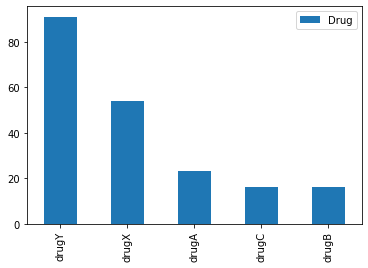

In [27]:
data = pd.read_csv('DATA/drug200.csv')
drug_count = pd.DataFrame(data["Drug"].value_counts())
drug_count_bar = drug_count.plot(kind="bar")
plt.savefig('drug-distribution.pdf')

In [3]:
# bp levels is ordinal therefore use categorical
data.BP=pd.Categorical(data.BP,["LOW","NORMAL","HIGH"],ordered=True)
data.BP= data.BP.cat.codes
# cholesterol levels is ordinal therefore use categorical
data.Cholesterol=pd.Categorical(data.Cholesterol,["LOW","NORMAL","HIGH"],ordered=True)
data.Cholesterol= data.Cholesterol.cat.codes
# sex is nominal therefore use get_dummies
data_final = pd.get_dummies(data, columns=['Sex'])

In [4]:
train, test = train_test_split(data_final)
x_train = train.iloc[:,:-3].values
y_train = train.iloc[:, -3].values
x_test = test.iloc[:,:-3].values
y_test = test.iloc[:, -3].values

In [5]:
#Defining lists to keep track of accuracy, macro-average F1 and wighted average F1.
GaussStats = np.zeros((3,10))
DTClfStats = np.zeros((3,10))
TDTClfStats = np.zeros((3,10))
PClfStats = np.zeros((3,10))
MLPClfStats = np.zeros((3,10))
TMPClfStats = np.zeros((3,10))

In [6]:
def GaussClf(iterationIndex):    
    clf = GaussianNB()
    clf.fit(x_train,y_train)
    y_pred =clf.predict(x_test)
    
    GaussStats[0,i] += accuracy_score(y_test, y_pred)
    GaussStats[1,i] += f1_score(y_test, y_pred, average='macro')
    GaussStats[2,i] += f1_score(y_test, y_pred, average='weighted')
    
    if (iterationIndex == 0):
        with open('drugs-performance.txt','a') as file:
            file.write("a)\n******************** Gaussian Naive Bayes Classifier ********************\n")
            file.write("b)\n" + str(confusion_matrix(y_test, y_pred))+ "\n")
            file.write("c)\n" + str(classification_report(y_test,y_pred)) + "\n")
            file.write("d)\naccuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
            file.write("macro average F1: " + str(f1_score(y_test, y_pred, average='macro')) + "\n")
            file.write("weighted average F1: " + str(f1_score(y_test, y_pred, average='weighted')) + "\n")

In [7]:
def DTClf(iterationIndex):
    clf = DecisionTreeClassifier()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    
    DTClfStats[0,i] += accuracy_score(y_test, y_pred)
    DTClfStats[1,i] += f1_score(y_test, y_pred, average='macro')
    DTClfStats[2,i] += f1_score(y_test, y_pred, average='weighted')
    
    if (iterationIndex == 0):
        with open('drugs-performance.txt','a') as file:
            file.write("a)\n******************** Base Decision Tree Classifier ********************\n")
            file.write("b)\n" + str(confusion_matrix(y_test, y_pred))+ "\n")
            file.write("c)\n" + str(classification_report(y_test,y_pred)) + "\n")
            file.write("d)\naccuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
            file.write("macro average F1: " + str(f1_score(y_test, y_pred, average='macro')) + "\n")
            file.write("weighted average F1: " + str(f1_score(y_test, y_pred, average='weighted')) + "\n")

In [8]:
def TDTClf(iterationIndex):
    parameters = {
        'criterion': ['gini','entropy'],
        'max_depth': [60,80],
        'min_samples_split': [20,60,80],
    }
    grid = GridSearchCV(DecisionTreeClassifier(),parameters)
    grid.fit(x_train,y_train)
    bestParams = grid.best_params_
    y_pred = grid.predict(x_test)
    
    TDTClfStats[0,i] += accuracy_score(y_test, y_pred)
    TDTClfStats[1,i] += f1_score(y_test, y_pred, average='macro')
    TDTClfStats[2,i] += f1_score(y_test, y_pred, average='weighted')
    
    if (iterationIndex == 0):
        with open('drugs-performance.txt','a') as file:
            file.write("a)\n******************** Top Decision Tree Classifier ********************\n")
            file.write(f"\n******************** Best hyper parameters found: {bestParams} ********************\n")
            file.write("b)\n" + str(confusion_matrix(y_test, y_pred))+ "\n")
            file.write("c)\n" + str(classification_report(y_test,y_pred)) + "\n")
            file.write("d)\naccuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
            file.write("macro average F1: " + str(f1_score(y_test, y_pred, average='macro')) + "\n")
            file.write("weighted average F1: " + str(f1_score(y_test, y_pred, average='weighted')) + "\n")

In [9]:
def PClf(iterationIndex):
    clf = Perceptron()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    
    PClfStats[0,i] += accuracy_score(y_test, y_pred)
    PClfStats[1,i] += f1_score(y_test, y_pred, average='macro')
    PClfStats[2,i] += f1_score(y_test, y_pred, average='weighted')
    
    if (iterationIndex == 0):
        with open('drugs-performance.txt','a') as file:
            file.write("a)\n******************** Perceptron Classifier ********************\n")
            file.write("b)\n" + str(confusion_matrix(y_test, y_pred))+ "\n")
            file.write("c)\n" + str(classification_report(y_test,y_pred)) + "\n")
            file.write("d)\naccuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
            file.write("macro average F1: " + str(f1_score(y_test, y_pred, average='macro')) + "\n")
            file.write("weighted average F1: " + str(f1_score(y_test, y_pred, average='weighted')) + "\n")

In [10]:
def MLPClf(iterationIndex):
    clf = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd')
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)

    MLPClfStats[0,i] += accuracy_score(y_test, y_pred)
    MLPClfStats[1,i] += f1_score(y_test, y_pred, average='macro')
    MLPClfStats[2,i] += f1_score(y_test, y_pred, average='weighted')
    
    if (iterationIndex == 0):
        with open('drugs-performance.txt','a') as file:
            file.write("a)\n******************** Base Multi-Layered Perceptron Classifier ********************\n")
            file.write("b)\n" + str(confusion_matrix(y_test, y_pred))+ "\n")
            file.write("c)\n" + str(classification_report(y_test,y_pred)) + "\n")
            file.write("d)\naccuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
            file.write("macro average F1: " + str(f1_score(y_test, y_pred, average='macro')) + "\n")
            file.write("weighted average F1: " + str(f1_score(y_test, y_pred, average='weighted')) + "\n")

In [11]:
def TMLPClf(iterationIndex):
    parameters = {
        'activation': ['logistic','tanh','relu','identity'],
        'hidden_layer_sizes':[(2,90),(3,50)],
        'solver':['adam','sgd'],
    }
    grid = GridSearchCV(MLPClassifier(),parameters)
    grid.fit(x_train,y_train)
    bestParams = grid.best_params_
    y_pred = grid.predict(x_test)

    TMPClfStats[0,i] += accuracy_score(y_test, y_pred)
    TMPClfStats[1,i] += f1_score(y_test, y_pred, average='macro')
    TMPClfStats[2,i] += f1_score(y_test, y_pred, average='weighted')
    
    if (iterationIndex == 0):
        with open('drugs-performance.txt','a') as file:
            file.write("a)\n******************** Top Multi-Layered Perceptron Classifier ********************\n")
            file.write(f"\n******************** Best hyper parameters found: {bestParams} ********************\n")
            file.write("b)\n" + str(confusion_matrix(y_test, y_pred))+ "\n")
            file.write("c)\n" + str(classification_report(y_test,y_pred)) + "\n")
            file.write("d)\naccuracy: " + str(accuracy_score(y_test, y_pred)) + "\n")
            file.write("macro average F1: " + str(f1_score(y_test, y_pred, average='macro')) + "\n")
            file.write("weighted average F1: " + str(f1_score(y_test, y_pred, average='weighted')) + "\n")

In [12]:
for i in range(10):
    GaussClf(i)
    DTClf(i)
    TDTClf(i)
    PClf(i)
    MLPClf(i)
    TMLPClf(i)

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aosma\miniconda3\lib\site-packages\sklearn\neural_network\_

In [25]:
with open('drugs-performance.txt','a') as file:
    file.write("\n*************************Averages*************************\n")
    file.write("\n\nGaussianNB average accuracy, average macro-average F1 and average weighted-average F1 respectively: \n" 
               + str(np.average(GaussStats[0])) +" | "+ str(np.average(GaussStats[1])) +" | "+ str(np.average(GaussStats[2])))
    file.write("\n\nBase Decision Tree average accuracy, average macro-average F1 and average weighted-average F1 respectively: \n" 
               + str(np.average(DTClfStats[0])) +" | "+ str(np.average(DTClfStats[1])) +" | "+ str(np.average(DTClfStats[2])))
    file.write("\n\nTop Decision Tree average accuracy, average macro-average F1 and average weighted-average F1 respectively: \n" 
               + str(np.average(TDTClfStats[0])) +" | "+ str(np.average(TDTClfStats[1])) +" | "+ str(np.average(DTClfStats[2])))
    file.write("\n\nPerceptron average accuracy, average macro-average F1 and average weighted-average F1 respectively:\n" 
               + str(np.average(PClfStats[0])) +" | "+ str(np.average(PClfStats[1])) +" | "+ str(np.average(PClfStats[2])))
    file.write("\n\nBase MLP average accuracy, average macro-average F1 and average weighted-average F1 respectively: \n" 
               + str(np.average(MLPClfStats[0])) +" | "+ str(np.average(MLPClfStats[1])) +" | "+ str(np.average(MLPClfStats[2])))
    file.write("\n\nTop MLP average accuracy, average macro-average F1 and average weighted-average F1 respectively: \n" 
               + str(np.average(TMPClfStats[0])) +" | "+ str(np.average(TMPClfStats[1])) +" | "+ str(np.average(TMPClfStats[2])))


In [26]:
with open('drugs-performance.txt','a') as file:
    file.write("\n\n*************************Standard Deviations*************************\n")
    file.write('\n\nStandard deviation GaussianNB: ' + str(np.std(GaussStats[0])) +" | "+ str(np.std(GaussStats[1])) +" | "+ str(np.std(GaussStats[2])))
    file.write('\n\nStandard deviation Base Decision Tree: ' + str(np.std(DTClfStats[0])) +" | "+ str(np.std(DTClfStats[1])) +" | "+ str(np.std(DTClfStats[2])))
    file.write('\n\nStandard deviation Top Decision Tree: ' + str(np.std(TDTClfStats[0])) +" | "+ str(np.std(TDTClfStats[1])) +" | "+ str(np.std(TDTClfStats[2])))
    file.write('\n\nStandard deviation Perceptron: ' + str(np.std(PClfStats[0])) +" | "+ str(np.std(PClfStats[1])) +" | "+ str(np.std(PClfStats[2])))
    file.write('\n\nStandard deviation Base MLP: ' + str(np.std(MLPClfStats[0])) +" | "+ str(np.std(MLPClfStats[1])) +" | "+ str(np.std(MLPClfStats[2])))
    file.write('\n\nStandard deviation Top MLP: ' + str(np.std(TMPClfStats[0])) +" | "+ str(np.std(TMPClfStats[1])) +" | "+ str(np.std(TMPClfStats[2])))
